In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.ensemble import RandomForestRegressor
from feature_utils_RF import create_features_from_raw_df
from train_test_division import divide_into_train_test

In [2]:
# Load in the csv file for sequences (input information)
csv_sequences = '../data/GDPa1_v1.2_sequences.csv'
sequences = pd.read_csv(csv_sequences)
sequences.head()


,antibody_id,antibody_name,vh_protein_sequence,vl_protein_sequence,light_aligned_aho,heavy_aligned_aho,hc_subtype,lc_subtype,hierarchical_cluster_IgG_isotype_stratified_fold
0,GDPa1-001,abagovomab,QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLD...,DIELTQSPASLSASVGETVTITCQASENIYSYLAWHQQKQGKSPQL...,DIELTQSPASLSASVGETVTITCQAS--ENIY------SYLAWHQQ...,QVKLQES-GAELARPGASVKLSCKASG-YTFTN-----YWMQWVKQ...,IgG1,Kappa,2
1,GDPa1-002,abituzumab,QVQLQQSGGELAKPGASVKVSCKASGYTFSSFWMHWVRQAPGQGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDISNYLAWYQQKPGKAPKL...,DIQMTQSPSSLSASVGDRVTITCRAS--QDIS------NYLAWYQQ...,QVQLQQS-GGELAKPGASVKVSCKASG-YTFSS-----FWMHWVRQ...,IgG2,Kappa,0
2,GDPa1-003,abrezekimab,QVTLKESGPVLVKPTETLTLTCTVSGFSLTNYHVQWIRQPPGKALE...,DIQMTQSPSSLSASVGDRVTITCLASEDISNYLAWYQQKPGKAPKL...,DIQMTQSPSSLSASVGDRVTITCLAS--EDIS------NYLAWYQQ...,QVTLKES-GPVLVKPTETLTLTCTVSG-FSLTN-----YHVQWIRQ...,IgG4,Kappa,2
3,GDPa1-004,abrilumab,QVQLVQSGAEVKKPGASVKVSCKVSGYTLSDLSIHWVRQAPGKGLE...,DIQMTQSPSSVSASVGDRVTITCRASQGISSWLAWYQQKPGKAPKL...,DIQMTQSPSSVSASVGDRVTITCRAS--QGIS------SWLAWYQQ...,QVQLVQS-GAEVKKPGASVKVSCKVSG-YTLSD-----LSIHWVRQ...,IgG2,Kappa,0
4,GDPa1-005,adalimumab,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQGIRNYLAWYQQKPGKAPKL...,DIQMTQSPSSLSASVGDRVTITCRAS--QGIR------NYLAWYQQ...,EVQLVES-GGGLVQPGRSLRLSCAASG-FTFDD-----YAMHWVRQ...,IgG1,Kappa,0


In [3]:
# Load in the csv file for properties (output information)
csv_properties = '../data/GDPa1_v1.2_20250814.csv'
properties = pd.read_csv(csv_properties)
properties.head()

,antibody_id,antibody_name,Titer,Purity,SEC %Monomer,SMAC,HIC,HAC,PR_CHO,PR_Ova,...,hc_protein_sequence,hc_dna_sequence,vl_protein_sequence,lc_protein_sequence,lc_dna_sequence,hierarchical_cluster_fold,random_fold,hierarchical_cluster_IgG_isotype_stratified_fold,light_aligned_aho,heavy_aligned_aho
0,GDPa1-001,abagovomab,140.25,98.530,97.010,2.730,2.590,NaN,0.337837,0.263108,...,MRAWIFFLLCLAGRALAQVKLQESGAELARPGASVKLSCKASGYTF...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,DIELTQSPASLSASVGETVTITCQASENIYSYLAWHQQKQGKSPQL...,MRAWIFFLLCLAGRALADIELTQSPASLSASVGETVTITCQASENI...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,1,2,2,DIELTQSPASLSASVGETVTITCQAS--ENIY------SYLAWHQQ...,QVKLQES-GAELARPGASVKLSCKASG-YTFTN-----YWMQWVKQ...
1,GDPa1-002,abituzumab,193.31,99.825,97.620,2.745,2.545,3.690,0.205246,0.100155,...,MRAWIFFLLCLAGRALAQVQLQQSGGELAKPGASVKVSCKASGYTF...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,DIQMTQSPSSLSASVGDRVTITCRASQDISNYLAWYQQKPGKAPKL...,MRAWIFFLLCLAGRALADIQMTQSPSSLSASVGDRVTITCRASQDI...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,1,4,0,DIQMTQSPSSLSASVGDRVTITCRAS--QDIS------NYLAWYQQ...,QVQLQQS-GGELAKPGASVKVSCKASG-YTFSS-----FWMHWVRQ...
2,GDPa1-003,abrezekimab,114.75,98.350,89.055,2.740,2.705,NaN,0.138773,0.101180,...,MRAWIFFLLCLAGRALAQVTLKESGPVLVKPTETLTLTCTVSGFSL...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,DIQMTQSPSSLSASVGDRVTITCLASEDISNYLAWYQQKPGKAPKL...,MRAWIFFLLCLAGRALADIQMTQSPSSLSASVGDRVTITCLASEDI...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,2,2,2,DIQMTQSPSSLSASVGDRVTITCLAS--EDIS------NYLAWYQQ...,QVTLKES-GPVLVKPTETLTLTCTVSG-FSLTN-----YHVQWIRQ...
3,GDPa1-004,abrilumab,327.32,98.575,98.605,2.715,2.565,1.005,0.000000,0.054971,...,MRAWIFFLLCLAGRALAQVQLVQSGAEVKKPGASVKVSCKVSGYTL...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,DIQMTQSPSSVSASVGDRVTITCRASQGISSWLAWYQQKPGKAPKL...,MRAWIFFLLCLAGRALADIQMTQSPSSVSASVGDRVTITCRASQGI...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,1,3,0,DIQMTQSPSSVSASVGDRVTITCRAS--QGIS------SWLAWYQQ...,QVQLVQS-GAEVKKPGASVKVSCKVSG-YTLSD-----LSIHWVRQ...
4,GDPa1-005,adalimumab,313.39,99.300,96.120,2.705,2.495,NaN,0.183387,0.085628,...,MRAWIFFLLCLAGRALAEVQLVESGGGLVQPGRSLRLSCAASGFTF...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,DIQMTQSPSSLSASVGDRVTITCRASQGIRNYLAWYQQKPGKAPKL...,MRAWIFFLLCLAGRALADIQMTQSPSSLSASVGDRVTITCRASQGI...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,0,2,0,DIQMTQSPSSLSASVGDRVTITCRAS--QGIR------NYLAWYQQ...,EVQLVES-GGGLVQPGRSLRLSCAASG-FTFDD-----YAMHWVRQ...


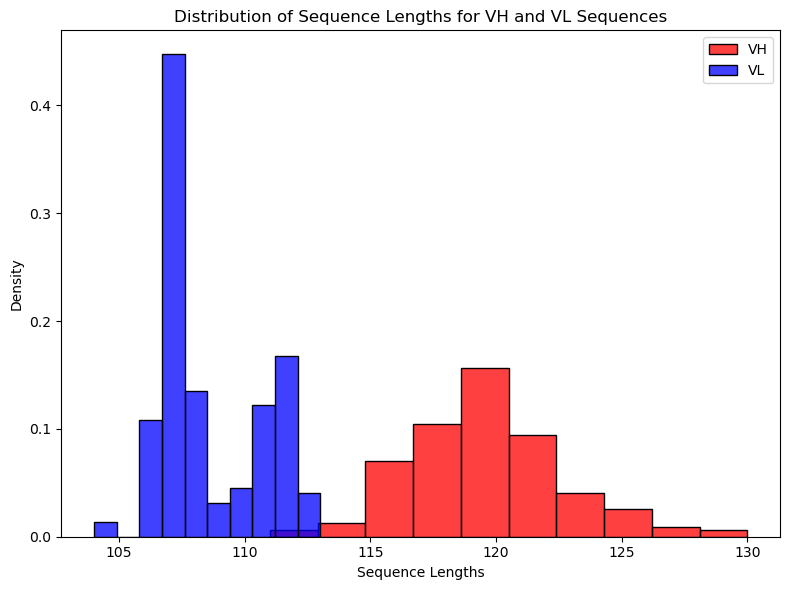

In [4]:
# Plot sequences lengths as a histogram

# Get sequence lengths
vh_sequence_lengths = [len(seq) for seq in sequences['vh_protein_sequence'].to_numpy()]
vl_sequence_lengths = [len(seq) for seq in sequences['vl_protein_sequence'].to_numpy()]

# Plot VH and VL sequence lengths
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(x=vh_sequence_lengths, stat='density', bins=10, color='red', label='VH')
sns.histplot(x=vl_sequence_lengths, stat='density', bins=10, color='blue', label='VL')
plt.legend()
ax.set_xlabel('Sequence Lengths')
ax.set_ylabel('Density')
plt.title('Distribution of Sequence Lengths for VH and VL Sequences')
fig.tight_layout()
fig.savefig('./sequence_length_distribution.png')


In [5]:
# Now let's get the derived features from the sequences
sequence_features = create_features_from_raw_df(sequences)
sequence_features.head()

/Users/jihoonshin/Desktop/MSSE/2-3. CHEM 277B/#Final Project/antibody-succotash/feature_engineering/feature_utils_RF.py:439: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[c] = lc_dummies[c]
/Users/jihoonshin/Desktop/MSSE/2-3. CHEM 277B/#Final Project/antibody-succotash/feature_engineering/feature_utils_RF.py:479: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col] = 0.0
/Users/jihoonshin/Desktop/MSSE/2-3. CHEM 277B/#Final Project/antibody-succotash/feature_engineering/feature_utils_RF.py:479: PerformanceWarning: DataFrame is 

,antibody_id,fv_length,fv_gravy,fv_hydrophobic_count,fv_pI,fv_charge_pH7,fv_frac_positive,fv_frac_negative,fv_frac_polar,fv_frac_special,...,HCDR3_terminal_hydrophobicity,LCDR1_length,LCDR1_gravy,LCDR1_hydrophobic_count,LCDR1_aromaticity,LCDR1_hydrophobic_cluster_max_len,LCDR1_hydrophobic_cluster_count,LCDR1_hydrophobic_moment,LCDR1_hydrophobic_density,LCDR1_terminal_hydrophobicity
0,GDPa1-001,226,-0.386283,84,8.908773,5.158367,0.110619,0.066372,0.287611,0.163717,...,-0.850000,11,-0.254545,6,0.181818,3,3,15.304293,0.545455,0.300000
1,GDPa1-002,225,-0.420000,81,7.778127,0.901363,0.088889,0.075556,0.324444,0.151111,...,0.483333,11,-0.545455,5,0.090909,3,3,19.093090,0.454545,0.133333
2,GDPa1-003,227,-0.222907,84,5.670622,-2.093660,0.088106,0.088106,0.308370,0.145374,...,-1.733333,11,0.209091,6,0.090909,3,3,11.209417,0.545455,1.516667
3,GDPa1-004,225,-0.343111,79,5.191242,-3.175735,0.080000,0.088889,0.320000,0.160000,...,-0.700000,11,0.018182,5,0.090909,3,3,14.836248,0.454545,0.200000
4,GDPa1-005,228,-0.286842,89,8.341774,1.978665,0.096491,0.078947,0.293860,0.140351,...,-0.250000,11,-0.600000,5,0.090909,3,3,17.323536,0.454545,0.133333


In [6]:
# features + fold + HIC -> merge
features_and_predictions = (
    sequence_features
    .merge(
        sequences[["antibody_id", "hierarchical_cluster_IgG_isotype_stratified_fold"]],
        on="antibody_id",
        how="left",
    )
    .merge(
        properties[["antibody_id", "HIC"]],
        on="antibody_id",
        how="left",
    )
)
df = features_and_predictions.dropna(
    subset=["HIC", "hierarchical_cluster_IgG_isotype_stratified_fold"]
).reset_index(drop=True)

In [7]:
features_and_predictions.head()

,antibody_id,fv_length,fv_gravy,fv_hydrophobic_count,fv_pI,fv_charge_pH7,fv_frac_positive,fv_frac_negative,fv_frac_polar,fv_frac_special,...,LCDR1_gravy,LCDR1_hydrophobic_count,LCDR1_aromaticity,LCDR1_hydrophobic_cluster_max_len,LCDR1_hydrophobic_cluster_count,LCDR1_hydrophobic_moment,LCDR1_hydrophobic_density,LCDR1_terminal_hydrophobicity,hierarchical_cluster_IgG_isotype_stratified_fold,HIC
0,GDPa1-001,226,-0.386283,84,8.908773,5.158367,0.110619,0.066372,0.287611,0.163717,...,-0.254545,6,0.181818,3,3,15.304293,0.545455,0.300000,2,2.590
1,GDPa1-002,225,-0.420000,81,7.778127,0.901363,0.088889,0.075556,0.324444,0.151111,...,-0.545455,5,0.090909,3,3,19.093090,0.454545,0.133333,0,2.545
2,GDPa1-003,227,-0.222907,84,5.670622,-2.093660,0.088106,0.088106,0.308370,0.145374,...,0.209091,6,0.090909,3,3,11.209417,0.545455,1.516667,2,2.705
3,GDPa1-004,225,-0.343111,79,5.191242,-3.175735,0.080000,0.088889,0.320000,0.160000,...,0.018182,5,0.090909,3,3,14.836248,0.454545,0.200000,0,2.565
4,GDPa1-005,228,-0.286842,89,8.341774,1.978665,0.096491,0.078947,0.293860,0.140351,...,-0.600000,5,0.090909,3,3,17.323536,0.454545,0.133333,0,2.495


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import PredefinedSplit, train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

from scipy.stats import spearmanr

# ============================================================
# I. Data Preparation
# ============================================================

# -------------------------------------------------
# I-1. Clean data: remove rows without HIC values
# -------------------------------------------------
df = features_and_predictions.copy()
df = df.dropna(subset=["HIC"]).reset_index(drop=True)

# -------------------------------------------------
# I-2. Define feature sets for each level
# -------------------------------------------------

# Level 1: Global Fv
level1_cols = [
    "fv_length",
    "fv_gravy",
    "fv_hydrophobic_count",
    "fv_pI",
    "fv_charge_pH7",
    "fv_frac_positive",
    "fv_frac_negative",
    "fv_frac_polar",
    "fv_frac_special",
]

# Level 2: VH/VL chain-level
#   - Physicochemical (sequence-derived)
#   - Composition & counts (sequence-derived)
#   - Categorical / annotation-based (subtype)

# 2-a. Physicochemical (sequence-derived, per chain)
level2_physchem_cols = [
    # length
    "vh_length", "vl_length",

    # GRAVY / hydrophobic
    "vh_gravy", "vl_gravy",
    "vh_hydrophobic_count", "vl_hydrophobic_count",

    # aromaticity / instability
    "vh_aromaticity", "vl_aromaticity",
    "vh_instability", "vl_instability",

    # pI / charge pH7
    "vh_pI", "vl_pI",
    "vh_charge_pH7", "vl_charge_pH7",

    # secondary structure fractions
    "vh_helix", "vh_turn", "vh_sheet",
    "vl_helix", "vl_turn", "vl_sheet",

    # MW / charge at other pH / extinction
    "vh_molecular_weight", "vl_molecular_weight",
    "vh_ph_7_35_charge", "vl_ph_7_35_charge",
    "vh_ph_7_45_charge", "vl_ph_7_45_charge",
    "vh_molar_extinction_reduced", "vh_molar_extinction_oxidized",
    "vl_molar_extinction_reduced", "vl_molar_extinction_oxidized",

    # AA class fractions
    "vh_frac_positive", "vh_frac_negative",
    "vh_frac_polar", "vh_frac_special",
    "vl_frac_positive", "vl_frac_negative",
    "vl_frac_polar", "vl_frac_special",

    # VH–VL relation (hydrophobicity)
    "vh_vl_hydrophobicity_gap",
    "vh_vl_hydrophobicity_ratio",
]

# 2-c. Composition & per-AA counts per chain (sequence-derived, Allison naming)
aa_count_cols = [
    c for c in df.columns
    if c.endswith("_vh_protein_sequence") or c.endswith("_vl_protein_sequence")
]

length_count_cols = [
    "vh_protein_sequence_length",
    "vl_protein_sequence_length",
]

derived_count_cols = [
    "vh_aromatic_count", "vl_aromatic_count",
    "vh_aliphatic_count", "vl_aliphatic_count",
]

# 2-e. Chain-level categorical / annotation-based (subtype one-hot)
subtype_cols = [
    c for c in df.columns
    if c.endswith("_hc_subtype") or c.endswith("_lc_subtype")
]

# extended Level 2 = Physicochemical + Composition/Counts + Categorical
level2_cols = (
    level2_physchem_cols
    + aa_count_cols
    + length_count_cols
    + derived_count_cols
    + subtype_cols
)

# Level 3: CDR-level (HCDR3 & LCDR1)
level3_cols = [
    # HCDR3 basic
    "HCDR3_length",
    "HCDR3_gravy",
    "HCDR3_hydrophobic_count",
    "HCDR3_aromaticity",
    "HCDR3_aromatic_cluster",

    # HCDR3 hydrophobicity-focused
    "HCDR3_hydrophobic_cluster_max_len",
    "HCDR3_hydrophobic_cluster_count",
    "HCDR3_hydrophobic_moment",
    "HCDR3_hydrophobic_density",
    "HCDR3_terminal_hydrophobicity",

    # LCDR1 basic
    "LCDR1_length",
    "LCDR1_gravy",
    "LCDR1_hydrophobic_count",
    "LCDR1_aromaticity",

    # LCDR1 hydrophobicity-focused
    "LCDR1_hydrophobic_cluster_max_len",
    "LCDR1_hydrophobic_cluster_count",
    "LCDR1_hydrophobic_moment",
    "LCDR1_hydrophobic_density",
    "LCDR1_terminal_hydrophobicity",
]

# -------------------------------------------------
# I-3. Validate feature columns (existing_cols)
# -------------------------------------------------

# Full model: Level 1 + 2 + 3
full_cols = level1_cols + level2_cols + level3_cols

# Ensure feature columns actually exist in the dataframe
def existing_cols(cols, df):
    return [c for c in cols if c in df.columns]

level1_cols = existing_cols(level1_cols, df)
level2_cols = existing_cols(level2_cols, df)
level3_cols = existing_cols(level3_cols, df)
full_cols   = existing_cols(full_cols,   df)


In [12]:
# ============================================================
# II. Modeling Utilities
# ============================================================

# -------------------------------------------------
# II-1. Fold-based train/test splitting
# -------------------------------------------------
def split_by_fold(
    df,
    target_col="HIC",
    fold_col="hierarchical_cluster_IgG_isotype_stratified_fold",
    fold=0,
):
    """
    Split the dataset into train/test according to a predefined fold column.

    - test  : rows where fold_col == fold
    - train : all remaining rows
    """

    if fold_col not in df.columns:
        raise ValueError(
            f"{fold_col} not found in dataframe. "
            f"Make sure the fold assignment column is included."
        )

    # boolean mask for test fold
    test_mask = df[fold_col] == fold

    test_df = df[test_mask].copy()
    train_df = df[~test_mask].copy()

    return train_df, test_df


# -------------------------------------------------
# II-2. Random Forest training + R²/RMSE evaluation
# -------------------------------------------------
def train_rf_model_with_fold(
    train_df,
    test_df,
    feature_cols,
    target_col="HIC",
    model_name="",
    fold_id=None,
    n_estimators=600,
    max_depth=5,
    min_samples_leaf=10,
    random_state=42,
):
    """
    Train and evaluate a Random Forest model using a predefined train/test split.
    No internal splitting is performed here.
    """

    feature_cols = existing_cols(feature_cols, train_df)

    if len(feature_cols) == 0:
        return None, {
            "model_name": model_name,
            "fold": fold_id,
            "n_features": 0,
            "R2_train": np.nan,
            "R2_test": np.nan,
            "RMSE_train": np.nan,
            "RMSE_test": np.nan,
        }

    # Extract train and test matrices
    X_train = train_df[feature_cols].copy()
    y_train = train_df[target_col].copy()

    X_test = test_df[feature_cols].copy()
    y_test = test_df[target_col].copy()

    # Drop missing rows
    train_data = pd.concat([X_train, y_train], axis=1).dropna()
    test_data = pd.concat([X_test, y_test], axis=1).dropna()

    X_train = train_data[feature_cols]
    y_train = train_data[target_col]
    X_test = test_data[feature_cols]
    y_test = test_data[target_col]

    if len(y_train) == 0 or len(y_test) == 0:
        return None, {
            "model_name": model_name,
            "fold": fold_id,
            "n_features": len(feature_cols),
            "R2_train": np.nan,
            "R2_test": np.nan,
            "RMSE_train": np.nan,
            "RMSE_test": np.nan,
        }

    # Initialize Random Forest
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        random_state=random_state,
        n_jobs=-1,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
    )

    # Train model
    rf.fit(X_train, y_train)

    # Predictions
    y_pred_train = rf.predict(X_train)
    y_pred_test = rf.predict(X_test)

    # Metrics
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    results = {
        "model_name": model_name,
        "fold": fold_id,
        "n_samples_train": len(y_train),
        "n_samples_test": len(y_test),
        "n_features": len(feature_cols),
        "R2_train": r2_train,
        "R2_test": r2_test,
        "RMSE_train": rmse_train,
        "RMSE_test": rmse_test,
    }

    return rf, results

# -------------------------------------------------
# II-3. Spearman correlation evaluation
# -------------------------------------------------

def compute_spearman_with_fold(
    rf,
    test_df,
    feature_cols,
    target_col="HIC",
    model_name="",
    fold_id=None,
):
    """
    Compute Spearman correlation for a given fold's test split.
    """

    if rf is None:
        return {
            "model_name": model_name,
            "fold": fold_id,
            "n_features": 0,
            "Spearman_rho_test": np.nan,
            "p_value": np.nan,
        }

    feature_cols = existing_cols(feature_cols, test_df)

    if len(feature_cols) == 0:
        return {
            "model_name": model_name,
            "fold": fold_id,
            "n_features": 0,
            "Spearman_rho_test": np.nan,
            "p_value": np.nan,
        }

    X_test = test_df[feature_cols].copy()
    y_test = test_df[target_col].copy()

    # Drop missing rows
    data = pd.concat([X_test, y_test], axis=1).dropna()
    X_test = data[feature_cols]
    y_test = data[target_col]

    if len(y_test) == 0:
        return {
            "model_name": model_name,
            "fold": fold_id,
            "n_features": len(feature_cols),
            "Spearman_rho_test": np.nan,
            "p_value": np.nan,
        }

    y_pred_test = rf.predict(X_test)

    rho, pval = spearmanr(y_test, y_pred_test)

    return {
        "model_name": model_name,
        "fold": fold_id,
        "n_features": len(feature_cols),
        "Spearman_rho_test": rho,
        "p_value": pval,
    }
    

In [13]:
# ============================================================
# III. Cross-Fold Training & Evaluation
# ============================================================

# -------------------------------------------------
# III-1. Define folds and initialize result containers
# -------------------------------------------------
unique_folds = sorted(
    df["hierarchical_cluster_IgG_isotype_stratified_fold"]
      .dropna()
      .unique()
)

all_metrics = []      # stores RF metrics for all folds
all_spearman = []     # stores Spearman results for all folds
models_per_fold = {}  # optional: store RF models per fold


# -------------------------------------------------
# III-2. Train models for each feature level (Lvl1, Lvl2, Lvl3, Full)
# -------------------------------------------------

for fold_id in unique_folds:
    print(f"\n===== Fold {fold_id} =====")

    train_df_fold, test_df_fold = split_by_fold(
        df,
        target_col="HIC",
        fold_col="hierarchical_cluster_IgG_isotype_stratified_fold",
        fold=fold_id,
    )

    # ---- Level 1 ----
    rf_lvl1, res_lvl1 = train_rf_model_with_fold(
        train_df_fold, test_df_fold, level1_cols,
        target_col="HIC",
        model_name="Level 1 (Fv only)",
        fold_id=fold_id,
    )
    sp_lvl1 = compute_spearman_with_fold(
        rf_lvl1, test_df_fold, level1_cols,
        target_col="HIC",
        model_name="Level 1 (Fv only)",
        fold_id=fold_id,
    )

    # ---- Level 2 ----
    rf_lvl2, res_lvl2 = train_rf_model_with_fold(
        train_df_fold, test_df_fold, level2_cols,
        target_col="HIC",
        model_name="Level 2 (Chain-level)",
        fold_id=fold_id,
    )
    sp_lvl2 = compute_spearman_with_fold(
        rf_lvl2, test_df_fold, level2_cols,
        target_col="HIC",
        model_name="Level 2 (Chain-level)",
        fold_id=fold_id,
    )

    # ---- Level 3 ----
    rf_lvl3, res_lvl3 = train_rf_model_with_fold(
        train_df_fold, test_df_fold, level3_cols,
        target_col="HIC",
        model_name="Level 3 (CDR-level)",
        fold_id=fold_id,
    )
    sp_lvl3 = compute_spearman_with_fold(
        rf_lvl3, test_df_fold, level3_cols,
        target_col="HIC",
        model_name="Level 3 (CDR-level)",
        fold_id=fold_id,
    )

    # ---- Full ----
    rf_full, res_full = train_rf_model_with_fold(
        train_df_fold, test_df_fold, full_cols,
        target_col="HIC",
        model_name="Full (Level1+2+3)",
        fold_id=fold_id,
    )
    sp_full = compute_spearman_with_fold(
        rf_full, test_df_fold, full_cols,
        target_col="HIC",
        model_name="Full (Level1+2+3)",
        fold_id=fold_id,
    )

    models_per_fold[fold_id] = {
        "lvl1": rf_lvl1,
        "lvl2": rf_lvl2,
        "lvl3": rf_lvl3,
        "full": rf_full,
    }

    all_metrics.extend([res_lvl1, res_lvl2, res_lvl3, res_full])
    all_spearman.extend([sp_lvl1, sp_lvl2, sp_lvl3, sp_full])


metrics_df = pd.DataFrame(all_metrics)
spearman_df = pd.DataFrame(all_spearman)

print("\n=== Per-fold RF Metrics ===")
print(metrics_df)

print("\n=== Per-fold Spearman Correlations ===")
print(spearman_df)



===== Fold 0 =====

===== Fold 1 =====

===== Fold 2 =====

===== Fold 3 =====

===== Fold 4 =====

=== Per-fold RF Metrics ===
               model_name  fold  n_samples_train  n_samples_test  n_features  \
0       Level 1 (Fv only)     0              189              53           9   
1   Level 2 (Chain-level)     0              189              53          91   
2     Level 3 (CDR-level)     0              189              53          19   
3       Full (Level1+2+3)     0              189              53         119   
4       Level 1 (Fv only)     1              194              48           9   
5   Level 2 (Chain-level)     1              194              48          91   
6     Level 3 (CDR-level)     1              194              48          19   
7       Full (Level1+2+3)     1              194              48         119   
8       Level 1 (Fv only)     2              194              48           9   
9   Level 2 (Chain-level)     2              194              48       

In [14]:
# ============================================================
# IV. Summary Metrics Across Folds
# ============================================================
# ------------------------------------------------------------
# IV-1. Cross-validated R² and Spearman rho for all base models
# ------------------------------------------------------------

r2_summary = (
    metrics_df
    .groupby("model_name")["R2_test"]
    .agg(["mean", "std"])
    .rename(columns={"mean": "CV_R2_mean", "std": "CV_R2_std"})
    .reset_index()
)

rho_summary = (
    spearman_df
    .groupby("model_name")["Spearman_rho_test"]
    .agg(["mean", "std"])
    .rename(columns={"mean": "rho_mean", "std": "rho_std"})
    .reset_index()
)

summary_df = r2_summary.merge(rho_summary, on="model_name")

print("\n=== Cross-validated Summary Across Folds ===")
print(summary_df)




=== Cross-validated Summary Across Folds ===
              model_name  CV_R2_mean  CV_R2_std  rho_mean   rho_std
0      Full (Level1+2+3)    0.144963   0.048324  0.416778  0.097632
1      Level 1 (Fv only)    0.151527   0.071690  0.421134  0.048279
2  Level 2 (Chain-level)    0.102960   0.055158  0.362355  0.131009
3    Level 3 (CDR-level)   -0.026996   0.130867  0.229242  0.145545


In [15]:
# ============================================================
# V. Feature Importance Analysis & Fold-Specific Top-N RF Modeling
# ============================================================

# ------------------------------------------------------------
# V-1. Extract per-fold feature importances from full RF models
# ------------------------------------------------------------

full_importances_list = []

for fold_id, models in models_per_fold.items():
    rf_full = models["full"]
    
    if rf_full is None:
        continue
    
    # Ensure feature alignment with DataFrame columns
    feature_cols = [c for c in full_cols if c in df.columns]
    
    # Extract feature importance values for this fold
    importances = rf_full.feature_importances_
    
    fold_imp_df = pd.DataFrame({
        "feature": feature_cols,
        "importance": importances,
        "fold": fold_id,
    })
    
    full_importances_list.append(fold_imp_df)

# Combine importance values across folds
full_importances = pd.concat(full_importances_list, axis=0)

print("\n=== Fold-Specific Feature Importances from Full Models (long format) ===")
print(full_importances.head())

# ------------------------------------------------------------
# V-2. Fold-specific Top-N feature RF models (fixed N)
# ------------------------------------------------------------

top_n = 11

all_metrics_top = []
all_spearman_top = []
models_per_fold_top = {}

for fold_id in unique_folds:
    print(f"\n===== Fold {fold_id} (Top {top_n} features, fold-specific) =====")

    # 1) Get importances for this fold only
    fold_imp = (
        full_importances[full_importances["fold"] == fold_id]
        .sort_values("importance", ascending=False)
    )

    # 2) Top-N features for this fold
    fold_top_features = fold_imp.head(top_n)["feature"].tolist()

    # 3) Split train/test for this fold
    train_df_fold, test_df_fold = split_by_fold(
        df,
        target_col="HIC",
        fold_col="hierarchical_cluster_IgG_isotype_stratified_fold",
        fold=fold_id,
    )

    # 4) Train RF using fold-specific Top-N features
    rf_top, res_top = train_rf_model_with_fold(
        train_df_fold,
        test_df_fold,
        fold_top_features,
        target_col="HIC",
        model_name=f"Full_top{top_n}_fold_specific",
        fold_id=fold_id,
    )

    # 5) Spearman evaluation
    sp_top = compute_spearman_with_fold(
        rf_top,
        test_df_fold,
        fold_top_features,
        target_col="HIC",
        model_name=f"Full_top{top_n}_fold_specific",
        fold_id=fold_id,
    )

    # 6) Save results
    models_per_fold_top[fold_id] = {
        "model": rf_top,
        "features": fold_top_features,
    }

    all_metrics_top.append(res_top)
    all_spearman_top.append(sp_top)


# ------------------------------------------------------------
# V-3. Per-fold Top-N results & CV summary (fixed N)
# ------------------------------------------------------------

metrics_top_df  = pd.DataFrame(all_metrics_top)
spearman_top_df = pd.DataFrame(all_spearman_top)

print("\n=== Per-fold RF Metrics (Top-N, fold-specific) ===")
print(metrics_top_df.to_string(index=False))

print("\n=== Per-fold Spearman (Top-N, fold-specific) ===")
print(spearman_top_df.to_string(index=False))


r2_top_summary = (
    metrics_top_df
    .groupby("model_name")["R2_test"]
    .agg(["mean", "std"])
    .rename(columns={"mean": "CV_R2_mean", "std": "CV_R2_std"})
    .reset_index()
)

rho_top_summary = (
    spearman_top_df
    .groupby("model_name")["Spearman_rho_test"]
    .agg(["mean", "std"])
    .rename(columns={"mean": "rho_mean", "std": "rho_std"})
    .reset_index()
)

top_summary_df = r2_top_summary.merge(rho_top_summary, on="model_name")

print("\n=== Cross-validated Summary (Top-N, fold-specific) ===")
print(top_summary_df.to_string(index=False))



=== Fold-Specific Feature Importances from Full Models (long format) ===
                feature  importance  fold
0             fv_length    0.013139     0
1              fv_gravy    0.007253     0
2  fv_hydrophobic_count    0.028087     0
3                 fv_pI    0.035578     0
4         fv_charge_pH7    0.019792     0

===== Fold 0 (Top 11 features, fold-specific) =====

===== Fold 1 (Top 11 features, fold-specific) =====

===== Fold 2 (Top 11 features, fold-specific) =====

===== Fold 3 (Top 11 features, fold-specific) =====

===== Fold 4 (Top 11 features, fold-specific) =====

=== Per-fold RF Metrics (Top-N, fold-specific) ===
              model_name  fold  n_samples_train  n_samples_test  n_features  R2_train  R2_test  RMSE_train  RMSE_test
Full_top11_fold_specific     0              189              53          11  0.441231 0.090239    0.260759   0.274966
Full_top11_fold_specific     1              194              48          11  0.496394 0.119743    0.247588   0.265393
Ful


### Evaluating top_n = 1 ###

### Evaluating top_n = 2 ###

### Evaluating top_n = 3 ###

### Evaluating top_n = 4 ###

### Evaluating top_n = 5 ###

### Evaluating top_n = 6 ###

### Evaluating top_n = 7 ###

### Evaluating top_n = 8 ###

### Evaluating top_n = 9 ###

### Evaluating top_n = 10 ###

### Evaluating top_n = 11 ###

### Evaluating top_n = 12 ###

### Evaluating top_n = 13 ###

### Evaluating top_n = 14 ###

### Evaluating top_n = 15 ###

### Evaluating top_n = 16 ###

### Evaluating top_n = 17 ###

### Evaluating top_n = 18 ###

### Evaluating top_n = 19 ###

### Evaluating top_n = 20 ###

### Evaluating top_n = 21 ###

### Evaluating top_n = 22 ###

### Evaluating top_n = 23 ###

### Evaluating top_n = 24 ###

### Evaluating top_n = 25 ###

=== Top-N Optimization Results ===
    top_n   R2_mean    R2_std  rho_mean   rho_std
0       1  0.084930  0.053698  0.359273  0.050814
1       2  0.020578  0.070456  0.312886  0.062559
2       3  0.041784  0.080718  0.340254  0.07901

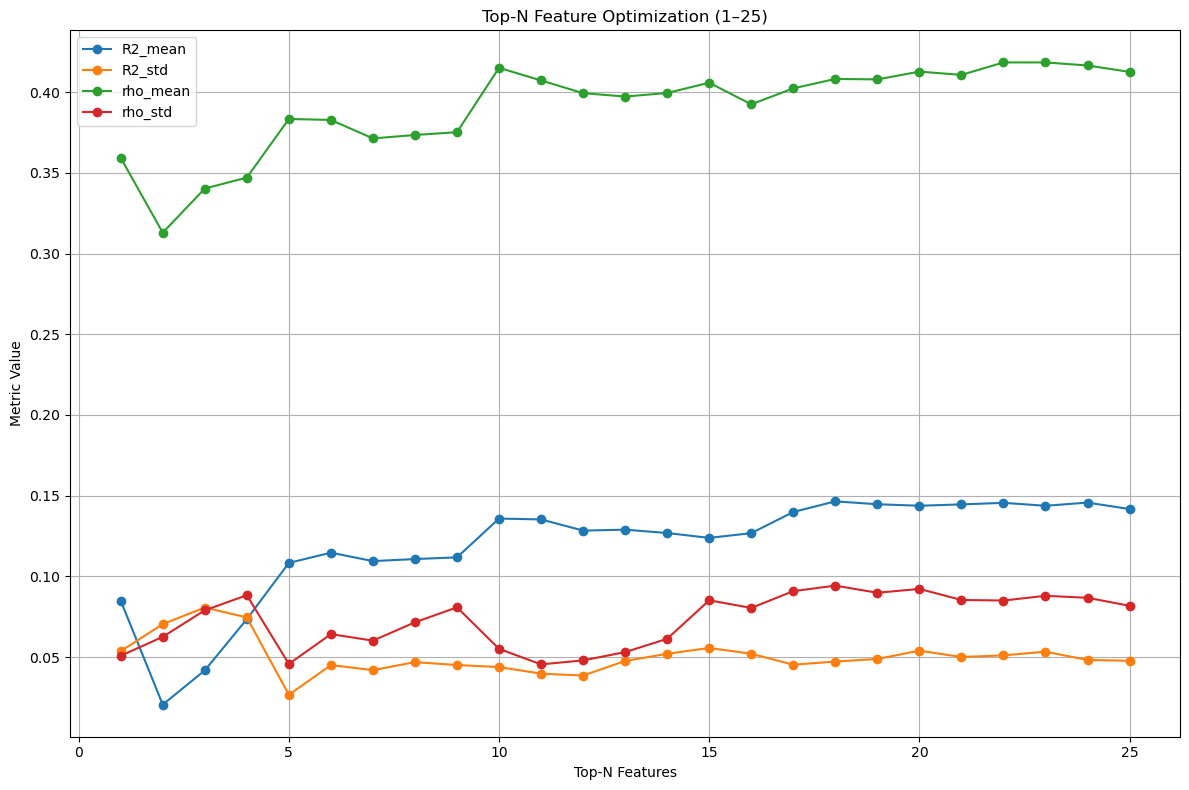

In [ ]:
# ------------------------------------------------------------
# (EXTRA) V-4. Top-N Optimization (1–25): global R2_mean, rho_mean, rho_std
# ------------------------------------------------------------

top_n_range = range(1, 26)

results_topn = []

for top_n in top_n_range:
    print(f"\n### Evaluating top_n = {top_n} ###")

    all_metrics_top = []
    all_spearman_top = []

    for fold_id in unique_folds:

        # 1) Fold-specific importances
        fold_imp = (
            full_importances[full_importances["fold"] == fold_id]
            .sort_values("importance", ascending=False)
        )

        # 2) Select top_n features
        fold_top_features = fold_imp.head(top_n)["feature"].tolist()

        # 3) Train/test split
        train_df_fold, test_df_fold = split_by_fold(
            df,
            target_col="HIC",
            fold_col="hierarchical_cluster_IgG_isotype_stratified_fold",
            fold=fold_id,
        )

        # 4) Train RF
        rf_top, res_top = train_rf_model_with_fold(
            train_df_fold,
            test_df_fold,
            fold_top_features,
            target_col="HIC",
            model_name=f"Full_top{top_n}_fold_specific",
            fold_id=fold_id,
        )

        # 5) Spearman evaluation
        sp_top = compute_spearman_with_fold(
            rf_top,
            test_df_fold,
            fold_top_features,
            target_col="HIC",
            model_name=f"Full_top{top_n}_fold_specific",
            fold_id=fold_id,
        )

        all_metrics_top.append(res_top)
        all_spearman_top.append(sp_top)


    # Convert to DataFrames for aggregation
    metrics_top_df  = pd.DataFrame(all_metrics_top)
    spearman_top_df = pd.DataFrame(all_spearman_top)

    # Aggregate across folds
    r2_mean  = metrics_top_df["R2_test"].mean()
    r2_std   = metrics_top_df["R2_test"].std()
    rho_mean = spearman_top_df["Spearman_rho_test"].mean()
    rho_std  = spearman_top_df["Spearman_rho_test"].std()

    # Save results
    results_topn.append({
        "top_n": top_n,
        "R2_mean": r2_mean,
        "R2_std":  r2_std,
        "rho_mean": rho_mean,
        "rho_std": rho_std
    })

# Convert full results to DF
results_topn_df = pd.DataFrame(results_topn)

print("\n=== Top-N Optimization Results ===")
print(results_topn_df)

# ------------------------------------------------------------
# (EXTRA) V-5. Visualization of Top-N Optimization (global)
# ------------------------------------------------------------

plt.figure(figsize=(12, 8))
plt.plot(results_topn_df["top_n"], results_topn_df["R2_mean"], marker='o', label="R2_mean")
plt.plot(results_topn_df["top_n"], results_topn_df["R2_std"],  marker='o', label="R2_std")
plt.plot(results_topn_df["top_n"], results_topn_df["rho_mean"], marker='o', label="rho_mean")
plt.plot(results_topn_df["top_n"], results_topn_df["rho_std"],  marker='o', label="rho_std")

plt.xlabel("Top-N Features")
plt.ylabel("Metric Value")
plt.title("Top-N Feature Optimization (1–25)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
